# 0. 라이브러리

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. 데이터셋 불러오기

#### 1. 데이터확인 및 불러오기

In [59]:
df = pd.read_csv("./train.csv")

In [60]:
df = df.drop('rn', axis=1) # rn 컬럼은 의미가 없으므로 

In [61]:
df

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [8]:
# df = df.iloc[:, 1:17]

In [9]:
# 상관관계 확인 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

KeyboardInterrupt: 

# 2. 모델생성 - K-means를 사용하기

In [41]:
from sklearn.cluster import KMeans

# K-Means 모델 생성
kmeans = KMeans(n_clusters=2) # 클러스터 갯수 2

#### 2-1. 정규화 및 모델학습

In [42]:
# 데이터 준비 (예를 들면, 특성 선택 및 스케일링)
X = df.iloc[:, 3:]  # 데이터프레임의 필요한 열을 선택
# 데이터 스케일링 (옵션)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 표준화 함수 객체 생성
X_scaled = scaler.fit_transform(X) # X를 정규화 

# 모델 학습
kmeans.fit(X_scaled) # kmeans모델에 적용시키기

C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [43]:
# 클러스터 라벨을 정규화된 X값을 K-means예측모델에 적용
cluster_labels = kmeans.predict(X_scaled) 

In [44]:
# 데이터의 클러스터 행렬에 라벨링
df['Cluster'] = cluster_labels 

# 3. 시각화

#### t-SNE (확률적 이웃 임베딩)


- t-SNE는 "t-Distributed Stochastic Neighbor Embedding"의 약자로, 
- 고차원 데이터를 저차원으로 축소하는 비선형 차원 축소 기술 중 하나 
- t-SNE는 데이터의 유사성을 보존하는 데 중점을 둠. 
- 특징
 - (1) 비선형 차원 축소: t-SNE는 고차원 공간에서의 데이터 포인트 간의 유사성을 측정하고, 이 유사성을 보존하면서 저차원으로 투영. 이는 고차원 데이터의 복잡한 구조를 감지하고 보다 간단한 저차원 구조로 매핑

 - (2) 클러스터링 강조: t-SNE는 데이터의 클러스터를 강조하고, 서로 다른 클러스터 간에는 거리를 멀게 만듬. 이로써 시각화나 클러스터링 과업에서 데이터의 구조를 뚜렷하게 나타낼 수 있음

 - (3) 확률 분포 모델링: t-SNE는 고차원과 저차원 데이터 사이의 확률 분포를 모델링. 고차원 데이터의 포인트들이 저차원에서 어떤 위치로 이동해야 하는지를 확률적으로 결정, 확률 분포를 최대한 유사하게 만들도록 함.

 - t-SNE는 데이터 시각화에 자주 활용되며, 주로 데이터의 구조를 이해하고 클러스터를 시각화하는 데 사용. 데이터 과학 및 머신러닝 분야에서 많은 시각화 작업에 도움을 줌

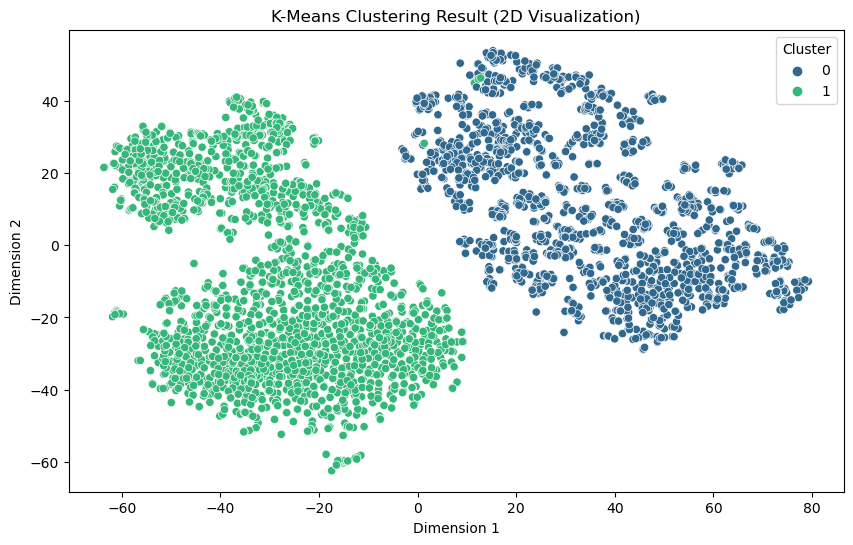

In [32]:
import seaborn as sns

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

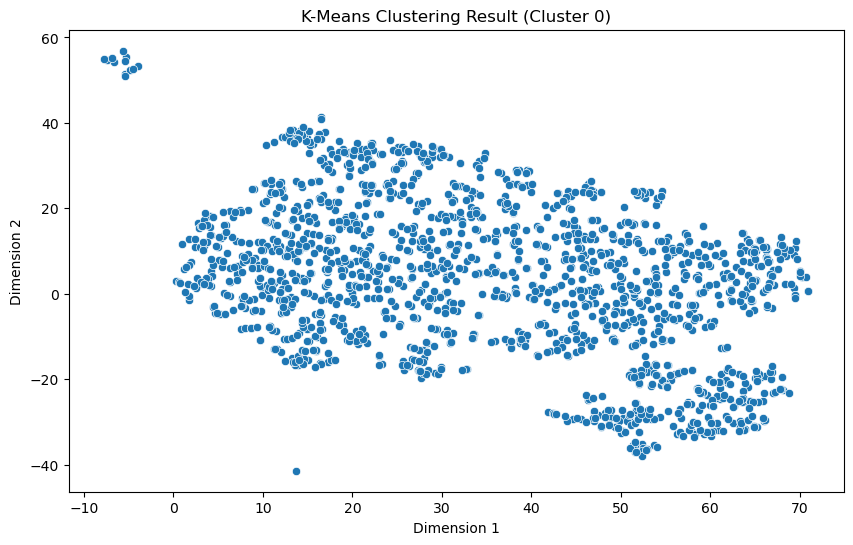

In [66]:
# 클러스터 0에 해당하는 데이터만 필터링 = 
cluster_0_df = df_tsne[df_tsne['Cluster'] == 0]

# Seaborn을 사용하여 클러스터 0 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
plt.title('K-Means Clustering Result (Cluster 0)')
plt.show()

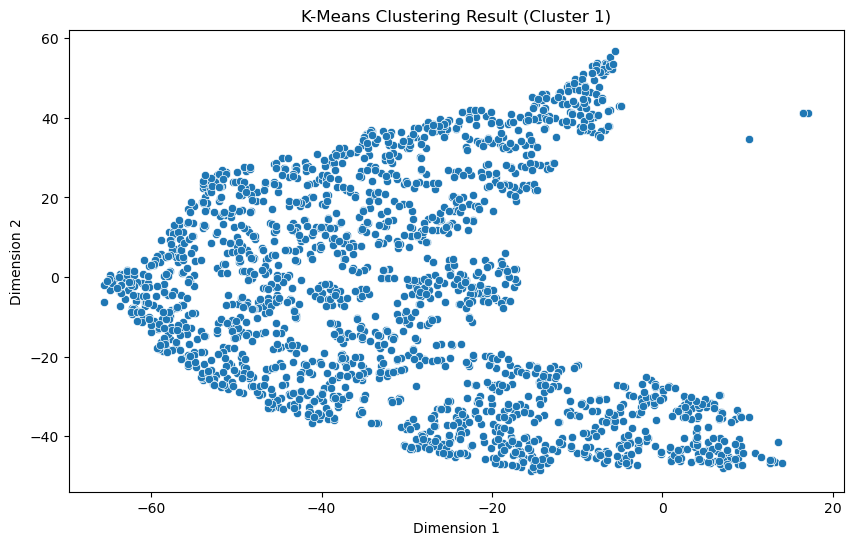

In [67]:
# 클러스터 0에 해당하는 데이터만 필터링
cluster_0_df = df_tsne[df_tsne['Cluster'] == 1]

# Seaborn을 사용하여 클러스터 0 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
plt.title('K-Means Clustering Result (Cluster 1)')
plt.show()

In [61]:
# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 2]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 2)')
# plt.show()

In [62]:
# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 3]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 3)')
# plt.show()

In [63]:
# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 4]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 4)')
# plt.show()

In [64]:
# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 5]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 5)')
# plt.show()

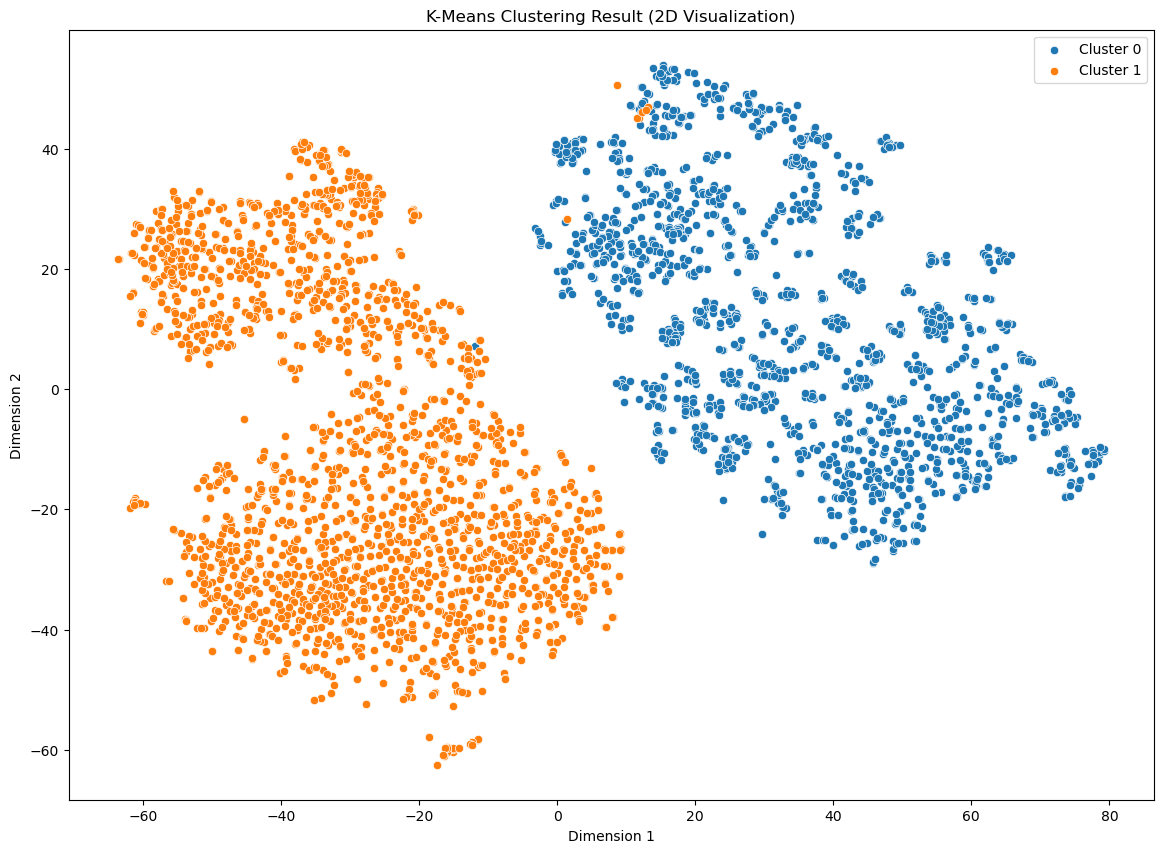

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# 클러스터별로 데이터 시각화
plt.figure(figsize=(14, 10))
palette = sns.color_palette("hsv", as_cmap=True, n_colors=6)  # 6개의 서로 다른 색상을 선택

for cluster in range(6):
    cluster_df = df_tsne[df_tsne['Cluster'] == cluster]
    sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_df, palette=palette, label=f'Cluster {cluster}')

plt.title('K-Means Clustering Result (2D Visualization)')
plt.legend()
plt.show()

# 4. 평가지표(K-means)

고차원 데이터에 대한 정규화는 특히 중요. 고차원 데이터에서는 특성 간의 스케일 차이가 더 크게 나타나기 때문에 정규화가 더 필요

In [53]:
X = df.iloc[:, 2:]  # 'activity' 열 이후의 모든 열 선택

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#고차원 데이터에 대한 정규화는 특히 중요고차원 데이터에서는 특성 간의 스케일 차이가 더 크게 나타나기 때문에 정규화가 더 필요

In [56]:
from sklearn.metrics import silhouette_score

k_range = range(2, 11)  # 클러스터 수 2에서 10까지 시도
# 실루엣 스코어를 저장할 리스트
silhouette_scores = []

# 엘보우 메서드를 사용하여 최적 클러스터 수 결정
distortions = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    distortions.append(kmeans.inertia_)


C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

#### 실루엣 스코어
 - 클러스터링 내 데이터 포인트의 분포를 고려
 - 각 클러스터마다 얼마나 데이터 포인트가 밀집되어 있는지, 그리고 다른 클러스터와 얼마나 분리되어 있는지를 고려

#### 엘보우 메서드
 - 클러스터 간 거리를 고려
 - 클러스터 간 분산을 통해 클러스터의 갯수(K)를 선택
 - 엘보우 메서드는 클러스터 간 거리의 변화가 어느 지점에서 갑자기 둔화되는 팔꿈치 지점(K)을 찾음.

Text(0, 0.5, 'Silhouette Score')

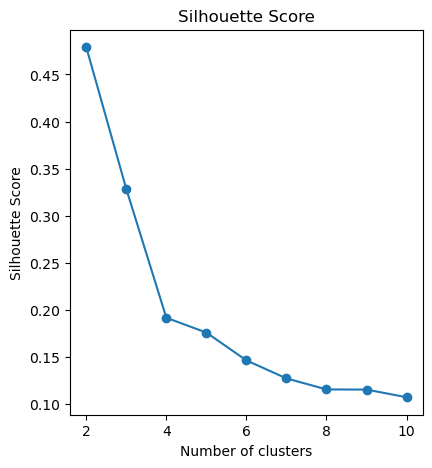

In [57]:
# 실루엣 스코어 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

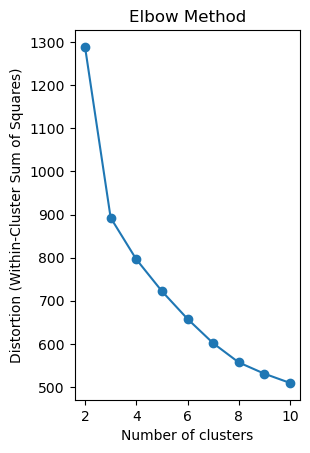

In [73]:
# 엘보우 메서드 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.show()

In [ ]:
# 엘보우메소드의 값을 근거로 클러스터링 갯수를 3으로 설정하여 k-means 적용해보기

In [75]:
from sklearn.cluster import KMeans

# K-Means 모델 생성
kmeans = KMeans(n_clusters=3) # 클러스터 갯수 2

In [76]:
# 데이터 준비 (예를 들면, 특성 선택 및 스케일링)
X = df.iloc[:, 2:]  # 데이터프레임의 필요한 열을 선택
# 데이터 스케일링 (옵션)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 표준화 함수 객체 생성
X_scaled = scaler.fit_transform(X) # X를 정규화 

# 모델 학습
kmeans.fit(X_scaled) # kmeans모델에 적용시키기

C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [77]:
cluster_labels = kmeans.predict(X_scaled) # 클러스터 라벨을 정규화된 X값을 K-means예측모델에 적용

In [78]:
df['Cluster'] = cluster_labels # 데이터의 클러스터 행렬에 라벨링

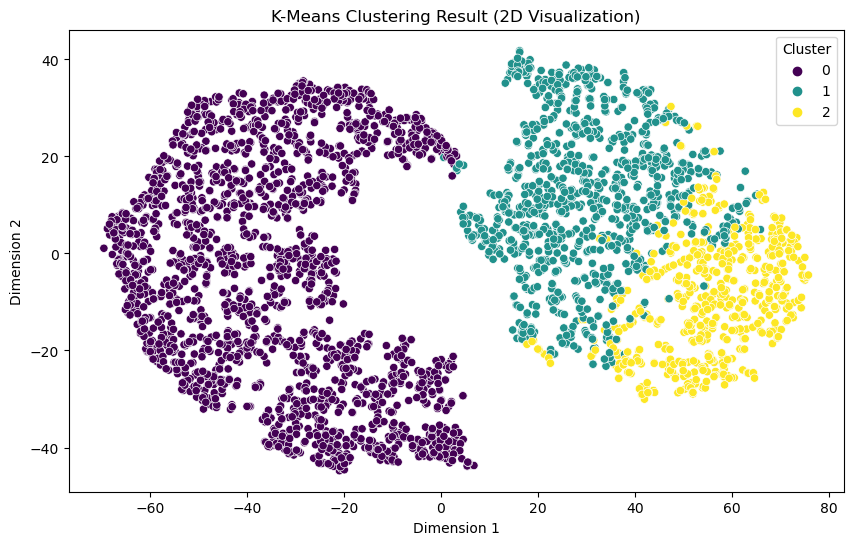

In [79]:
import seaborn as sns

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

# KNN with Means로 유의미한 패턴찾기

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [80]:
df = pd.read_csv("./train.csv")
df = df.drop('rn', axis=1) # rn 컬럼은 의미가 없으므로
df

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


C:\Users\isfs0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


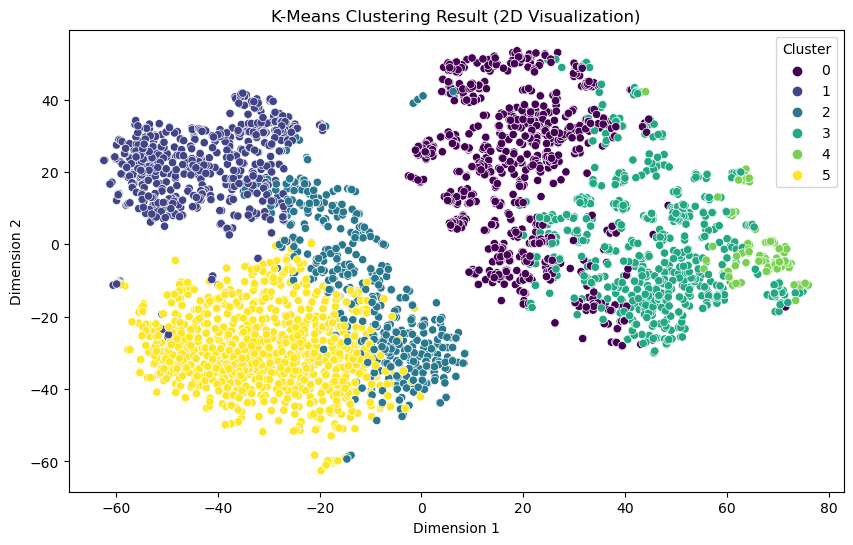

In [82]:
scaler = StandardScaler()
X = df.iloc[:, 1:]
X_scaled = scaler.fit_transform(X)

# K-means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# t-SNE를 사용하여 데이터를 2차원으로 시각화
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

# 랜덤포레스트

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [7]:
X = df.drop('activity', axis=1)  # 'activity' 열을 타겟으로 설정
y = df['activity']

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 나무의 개수 및 랜덤 시드 설정
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [9]:
# Feature Importance 계산
importances = model.feature_importances_

In [10]:
feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 중요도 특성 출력
print(feature_importance)

angle.X.gravityMean               0.031179
tGravityAcc.mean.X                0.030968
tGravityAcc.max.X                 0.030488
tGravityAcc.energy.X              0.024746
tGravityAcc.mean.Y                0.022002
                                    ...   
fBodyGyro.bandsEnergy.17.32.2     0.000058
fBodyBodyGyroJerkMag.energy       0.000036
fBodyAccJerk.bandsEnergy.25.32    0.000034
fBodyGyro.bandsEnergy.25.48.2     0.000027
fBodyGyro.bandsEnergy.57.64.1     0.000022
Length: 561, dtype: float64


angle.X.gravityMean               0.031179
tGravityAcc.mean.X                0.030968
tGravityAcc.max.X                 0.030488
tGravityAcc.energy.X              0.024746
tGravityAcc.mean.Y                0.022002
                                    ...   
fBodyGyro.bandsEnergy.17.32.2     0.000058
fBodyBodyGyroJerkMag.energy       0.000036
fBodyAccJerk.bandsEnergy.25.32    0.000034
fBodyGyro.bandsEnergy.25.48.2     0.000027
fBodyGyro.bandsEnergy.57.64.1     0.000022
Length: 561, dtype: float64


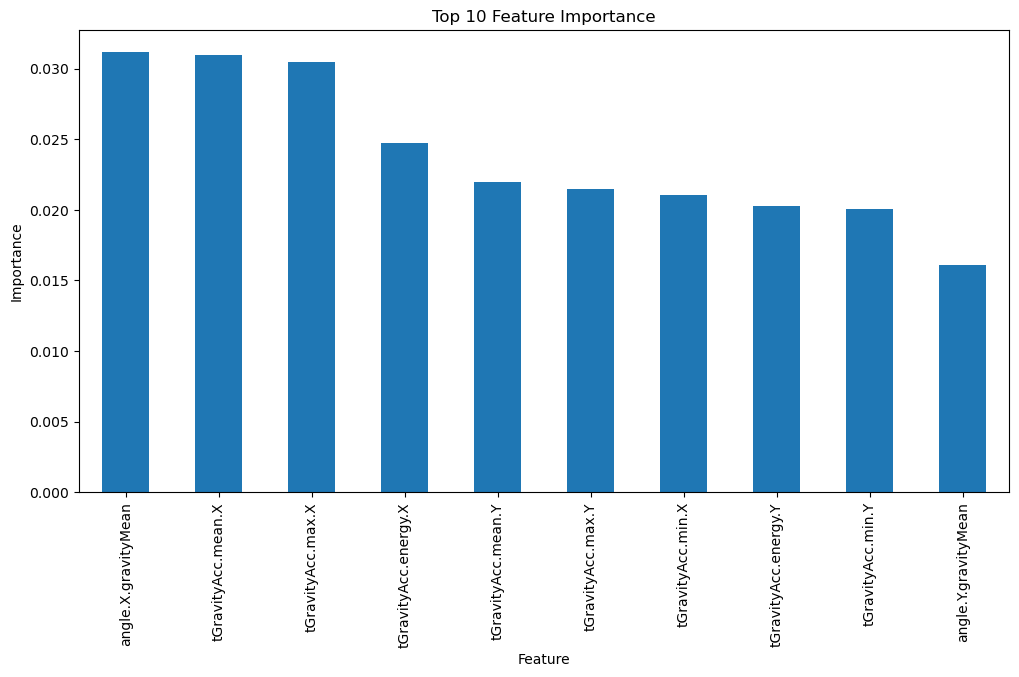

In [11]:
import matplotlib.pyplot as plt

# 중요도가 높은 순으로 정렬
feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 중요도 특성 출력
print(feature_importance)

# 중요도가 높은 순으로 상위 10개의 특성을 시각화
top_features = feature_importance.head(10)
top_features.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()